In [1]:
import pandas as pd
data = pd.read_csv('engine_data.csv')


In [2]:
rows_with_missing_values = data[data.isnull().any(axis=1)]
print(rows_with_missing_values)

Empty DataFrame
Columns: [Engine rpm, Lub oil pressure, Fuel pressure, Coolant pressure, lub oil temp, Coolant temp, Engine Condition]
Index: []


In [3]:
print(data.isnull().sum())

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


In [4]:
data.fillna(method='ffill', inplace=True)


In [5]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Engine rpm, Lub oil pressure, Fuel pressure, Coolant pressure, lub oil temp, Coolant temp, Engine Condition]
Index: []


In [6]:
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

0


In [7]:
import numpy as np

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

data_cleaned = data[~outliers]



In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])
data_scaled = pd.DataFrame(data_scaled, columns=['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp'])
data_scaled['Engine Condition'] = data['Engine Condition'].values
print(data_scaled.head())


   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0   -0.340948         -0.793040       1.859980          0.814018   
1    0.316739         -0.354506       3.454699          0.124605   
2   -1.013583         -0.334792      -0.037114         -1.226434   
3   -1.189216          0.395510       4.655845          1.343252   
4   -0.643634          2.319014       3.289902         -0.273186   

   lub oil temp  Coolant temp  Engine Condition  
0      2.089663      0.516347                 1  
1     -0.000799      0.647423                 0  
2      0.034988      0.196298                 1  
3     -1.129418     -1.071894                 1  
4      0.242235      1.381240                 0  


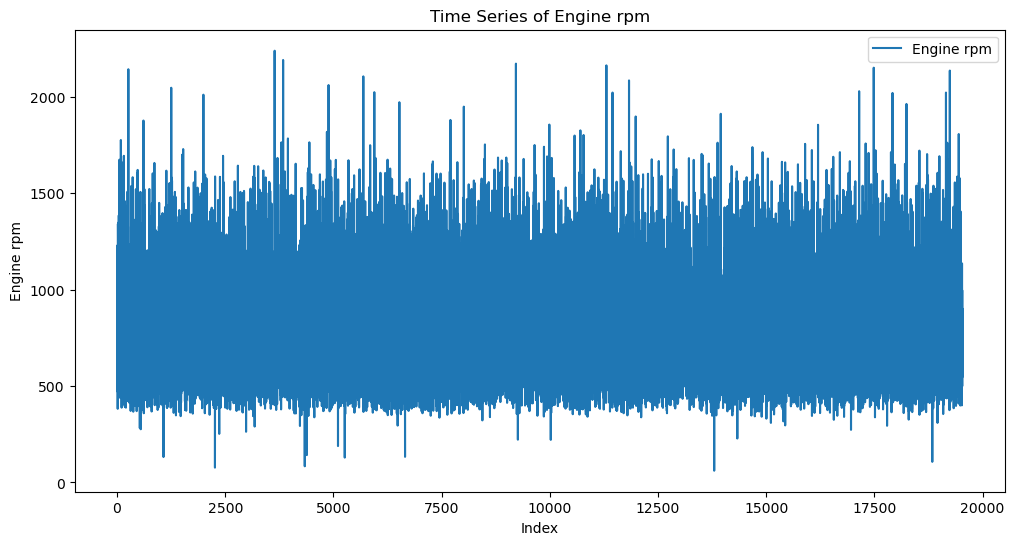

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Engine rpm'], label='Engine rpm')
plt.xlabel('Index')
plt.ylabel('Engine rpm')
plt.title('Time Series of Engine rpm')
plt.legend()
plt.show()

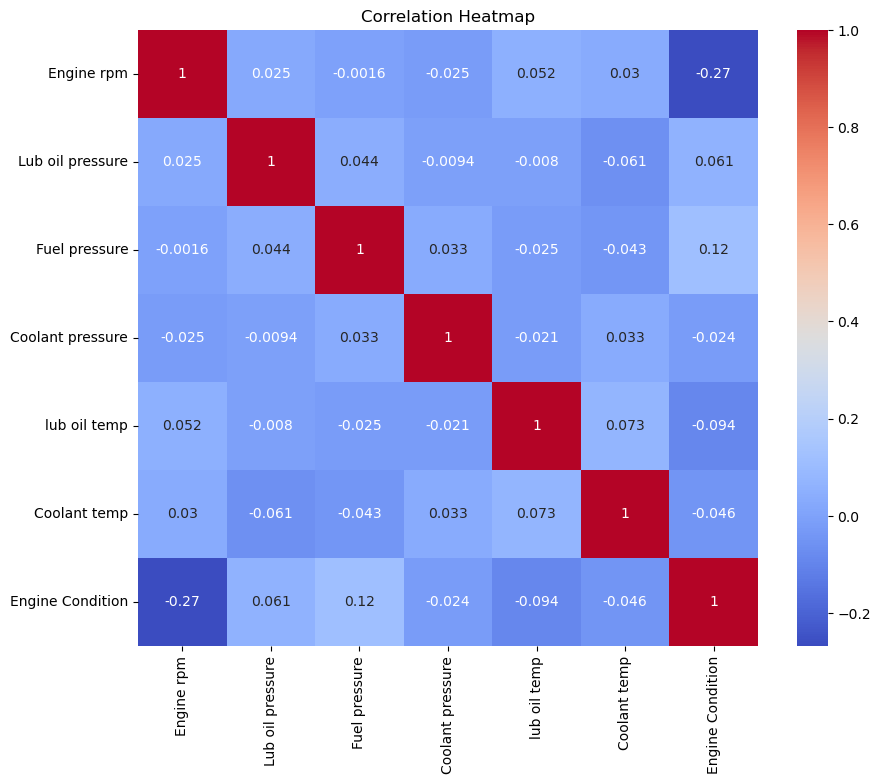

In [10]:
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


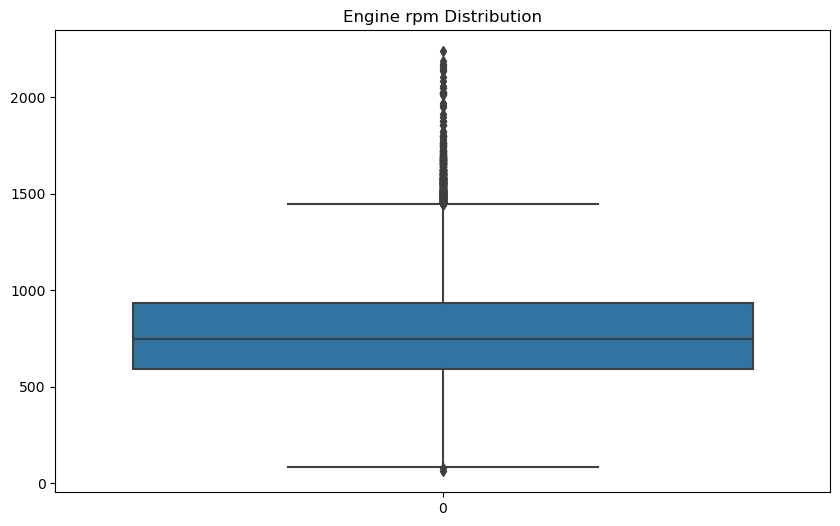

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['Engine rpm'])
plt.title("Engine rpm Distribution")
plt.show()


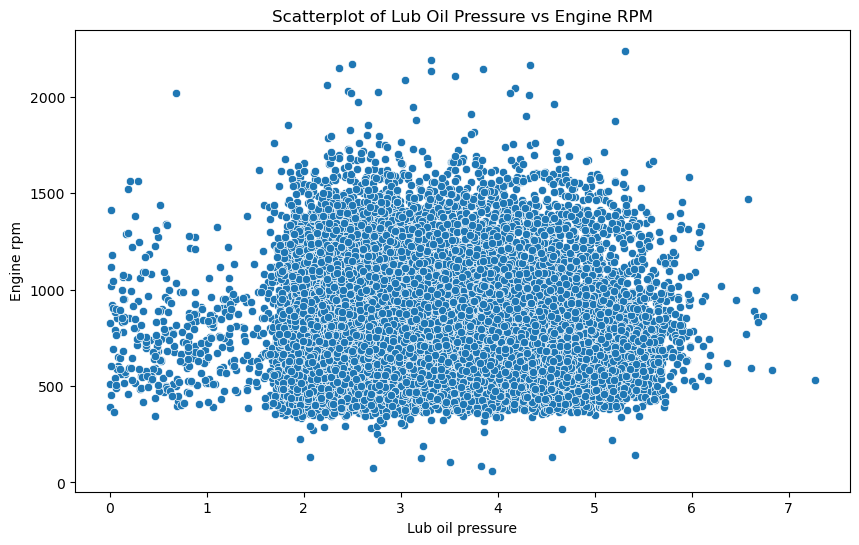

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Lub oil pressure'], y=data['Engine rpm'])
plt.title("Scatterplot of Lub Oil Pressure vs Engine RPM")
plt.xlabel('Lub oil pressure')
plt.ylabel('Engine rpm')
plt.show()


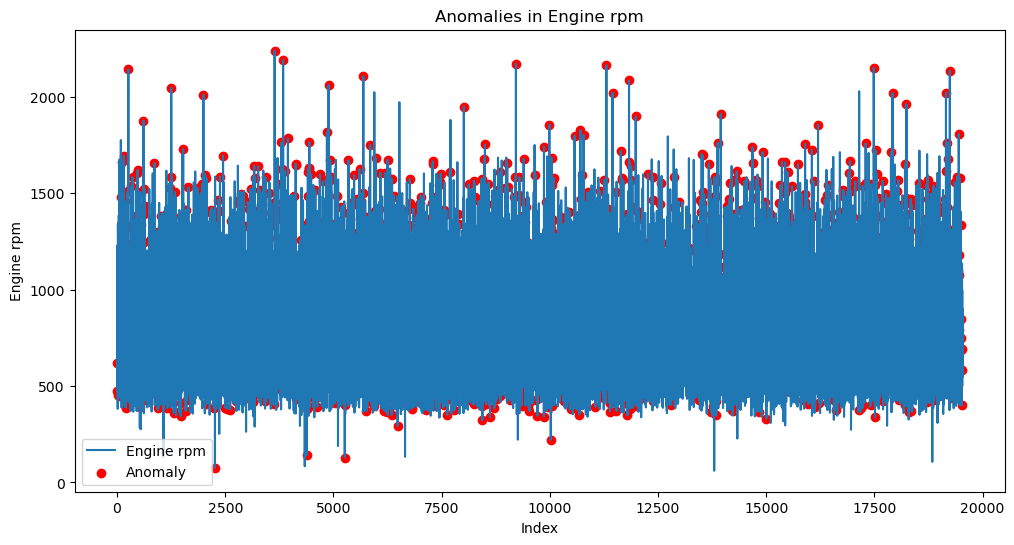

    Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
3          473          3.707835      19.510172          3.727455   
4          619          5.672919      15.738871          2.052251   
29         455          4.759290      13.971160          2.448630   
53         449          2.181478       5.416653          5.694339   
92         885          1.263918       2.518660          2.914547   

    lub oil temp  Coolant temp  Engine Condition  anomaly  
3      74.129907     71.774629                 1       -1  
4      78.396989     87.000225                 0       -1  
29     80.600164     75.811925                 1       -1  
53     83.360674     82.143068                 0       -1  
92     84.521585     82.268344                 0       -1  


In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])

model = IsolationForest(n_estimators=100, contamination=0.1)
model.fit(data_scaled)
data['anomaly'] = model.predict(data_scaled)

anomalies = data[data['anomaly'] == -1]

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Engine rpm'], label='Engine rpm')
plt.scatter(anomalies.index, anomalies['Engine rpm'], color='red', label='Anomaly')
plt.xlabel('Index')
plt.ylabel('Engine rpm')
plt.title('Anomalies in Engine rpm')
plt.legend()
plt.show()

print(anomalies.head())


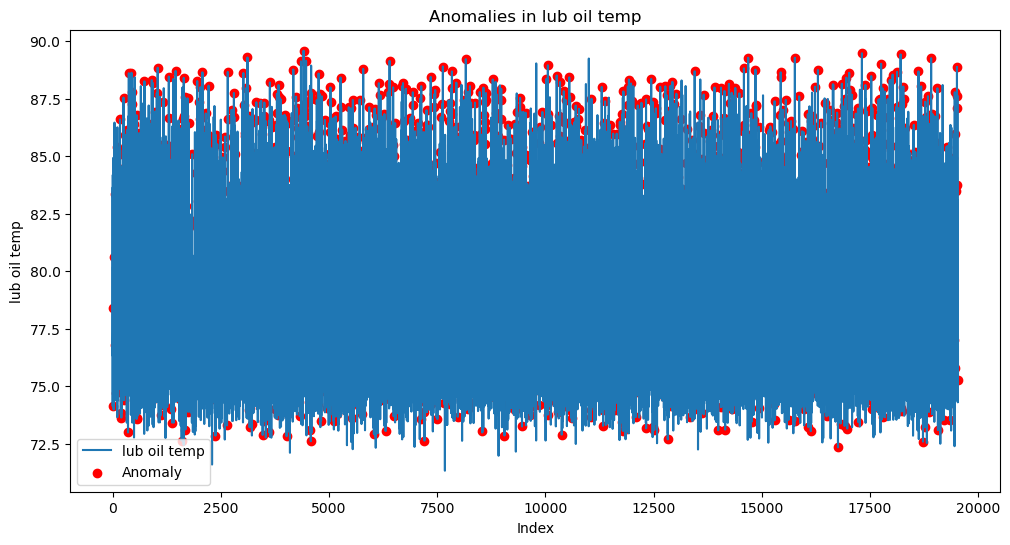

    Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
3          473          3.707835      19.510172          3.727455   
4          619          5.672919      15.738871          2.052251   
29         455          4.759290      13.971160          2.448630   
53         449          2.181478       5.416653          5.694339   
55        1674          2.501620       3.624157          2.043075   

    lub oil temp  Coolant temp  Engine Condition  anomaly  
3      74.129907     71.774629                 1       -1  
4      78.396989     87.000225                 0       -1  
29     80.600164     75.811925                 1       -1  
53     83.360674     82.143068                 0       -1  
55     76.772327     74.641940                 0       -1  


In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])

model = IsolationForest(n_estimators=100, contamination=0.1)
model.fit(data_scaled)
data['anomaly'] = model.predict(data_scaled)

anomalies = data[data['anomaly'] == -1]

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['lub oil temp'], label='lub oil temp')
plt.scatter(anomalies.index, anomalies['lub oil temp'], color='red', label='Anomaly')
plt.xlabel('Index')
plt.ylabel('lub oil temp')
plt.title('Anomalies in lub oil temp')
plt.legend()
plt.show()

print(anomalies.head())


In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_scaled_minmax = min_max_scaler.fit_transform(data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])

data_scaled_minmax = pd.DataFrame(data_scaled_minmax, columns=['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp'])

data_scaled_minmax['Engine Condition'] = data['Engine Condition'].values

print(data_scaled_minmax.head())


   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0    0.293388          0.342901       0.557732          0.424891   
1    0.374197          0.404592       0.766055          0.329322   
2    0.210744          0.407365       0.309909          0.142036   
3    0.189164          0.510102       0.922965          0.498256   
4    0.256198          0.780693       0.744527          0.274179   

   lub oil temp  Coolant temp  Engine Condition  
0      0.702246      0.149109                 1  
1      0.346077      0.155186                 0  
2      0.352175      0.134268                 1  
3      0.153785      0.075465                 1  
4      0.387485      0.189212                 0  


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(data_scaled_minmax[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

principal_df['Engine Condition'] = data_scaled_minmax['Engine Condition'].values

print(principal_df.head())


        PC1       PC2  Engine Condition
0  0.334843 -0.059793                 1
1 -0.019319  0.059166                 0
2  0.006860 -0.040279                 1
3 -0.246045  0.159986                 1
4  0.009542  0.410138                 0


c:\Users\Yuktha K S\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


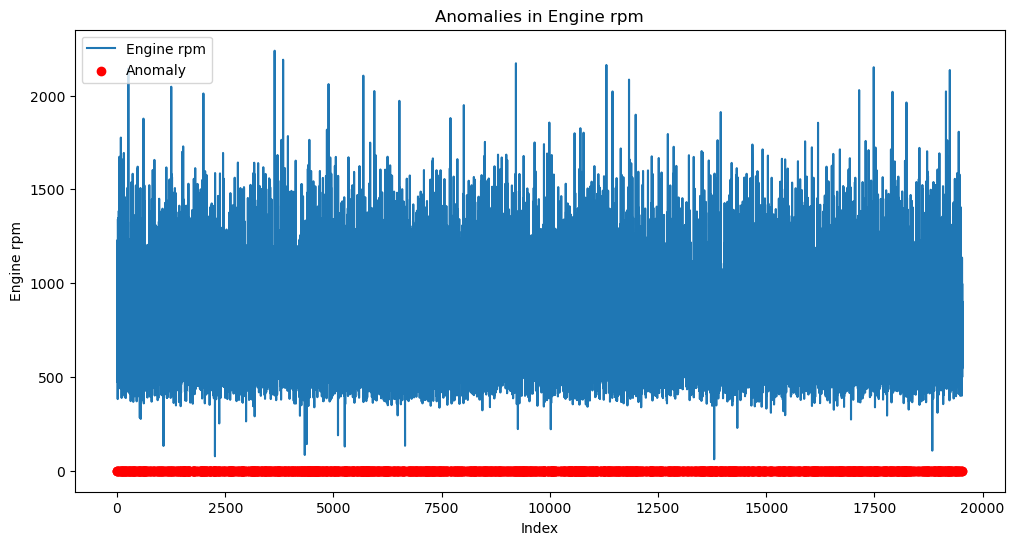

    Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
1     0.374197          0.404592       0.766055          0.329322   
3     0.189164          0.510102       0.922965          0.498256   
4     0.256198          0.780693       0.744527          0.274179   
29    0.180900          0.654887       0.660889          0.327199   
53    0.178145          0.299923       0.256136          0.761348   

    lub oil temp  Coolant temp  Engine Condition  anomaly  
1       0.346077      0.155186                 0       -1  
3       0.153785      0.075465                 1       -1  
4       0.387485      0.189212                 0       -1  
29      0.508148      0.105627                 1       -1  
53      0.659336      0.152925                 0       -1  


In [17]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, contamination=0.1)
model.fit(data_scaled_minmax[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])
data_scaled_minmax['anomaly'] = model.predict(data_scaled_minmax[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])

anomalies = data_scaled_minmax[data_scaled_minmax['anomaly'] == -1]

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Engine rpm'], label='Engine rpm')
plt.scatter(anomalies.index, anomalies['Engine rpm'], color='red', label='Anomaly')
plt.xlabel('Index')
plt.ylabel('Engine rpm')
plt.title('Anomalies in Engine rpm')
plt.legend()
plt.show()

print(anomalies.head())


In [ ]:
import pandas as pd
data_cleaned_no_anomalies = data_scaled_minmax[data_scaled_minmax['anomaly'] == 1]  
data_cleaned_no_anomalies = data_cleaned_no_anomalies.drop(columns=['anomaly'])
data_cleaned_no_anomalies.to_csv('engine_data_cleaned.csv', index=False)



In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled_minmax[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])
data_scaled_minmax['dbscan_anomaly'] = dbscan.labels_

dbscan_anomalies = data_scaled_minmax[data_scaled_minmax['dbscan_anomaly'] == -1]
print(dbscan_anomalies.head())


      Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
2423      0.1809          0.276421       0.369193          0.216304   

      lub oil temp  Coolant temp  Engine Condition  anomaly  dbscan_anomaly  
2423      0.284652           1.0                 1        1              -1  


In [21]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
ocsvm.fit(data_scaled_minmax[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])
data_scaled_minmax['ocsvm_anomaly'] = ocsvm.predict(data_scaled_minmax[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']])

ocsvm_anomalies = data_scaled_minmax[data_scaled_minmax['ocsvm_anomaly'] == -1]
print(ocsvm_anomalies.head())


    Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
3     0.189164          0.510102       0.922965          0.498256   
4     0.256198          0.780693       0.744527          0.274179   
53    0.178145          0.299923       0.256136          0.761348   
55    0.740588          0.344006       0.171325          0.272952   
71    0.341598          0.400657       0.831119          0.233300   

    lub oil temp  Coolant temp  Engine Condition  anomaly  dbscan_anomaly  \
3       0.153785      0.075465                 1       -1               0   
4       0.387485      0.189212                 0       -1               0   
53      0.659336      0.152925                 0       -1               0   
55      0.298505      0.096886                 0        1               0   
71      0.185993      0.101467                 1       -1               0   

    ocsvm_anomaly  
3              -1  
4              -1  
53             -1  
55             -1  
71             -1  


In [22]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

data = pd.read_csv('engine_data.csv')

data_imputer = KNNImputer(n_neighbors=5)
data_cleaned = pd.DataFrame(data_imputer.fit_transform(data), columns=data.columns)

print("Missing Values After Imputation:")
print(data_cleaned.isnull().sum())

iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(data_cleaned.drop(columns=['Engine Condition']))

data_cleaned['Anomaly'] = iso.predict(data_cleaned.drop(columns=['Engine Condition']))
data_cleaned = data_cleaned[data_cleaned['Anomaly'] == 1].drop(columns=['Anomaly'])

print(f"Number of Outliers Removed: {len(data) - len(data_cleaned)}")


Missing Values After Imputation:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


c:\Users\Yuktha K S\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of Outliers Removed: 196


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(data_cleaned.drop(columns=['Engine Condition']),data_cleaned['Engine Condition'])
print(f"Class Distribution After SMOTE: {pd.Series(y_resampled).value_counts()}")


Class Distribution After SMOTE: 1.0    12217
0.0    12217
Name: Engine Condition, dtype: int64


In [24]:
data_cleaned['Pressure_Ratio'] = data_cleaned['Fuel pressure'] / data_cleaned['Coolant pressure']


In [25]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
X_resampled_rfe = rfe.fit_transform(X_resampled, y_resampled)


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled_rfe, y_resampled, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, predictions):.2f}")


Decision Tree Accuracy: 0.64


In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    random_state=42,
    n_estimators=30,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    max_samples=0.8,
    warm_start=True
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Random Forest Accuracy: 0.65



Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.63      0.72      0.67      2450
         1.0       0.67      0.57      0.61      2437

    accuracy                           0.64      4887
   macro avg       0.65      0.64      0.64      4887
weighted avg       0.65      0.64      0.64      4887



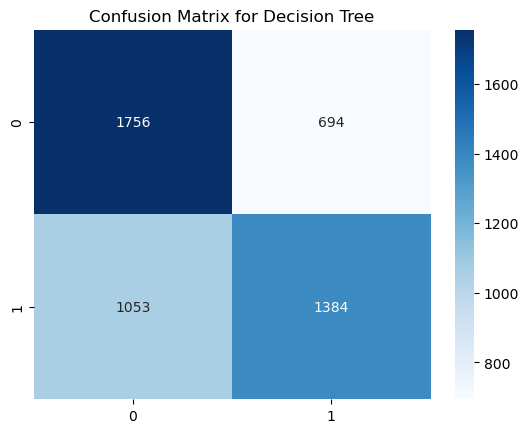


ROC AUC Score for Decision Tree: 0.67


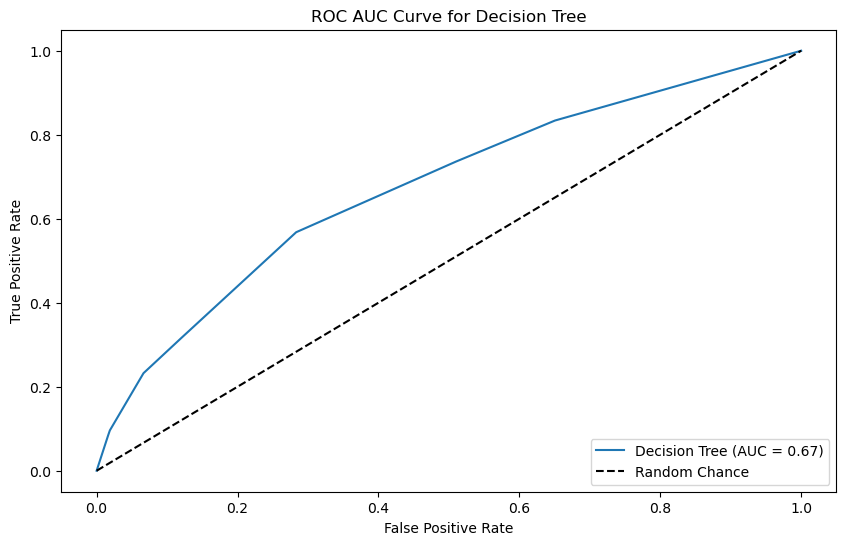


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68      2450
         1.0       0.68      0.57      0.62      2437

    accuracy                           0.65      4887
   macro avg       0.66      0.65      0.65      4887
weighted avg       0.66      0.65      0.65      4887



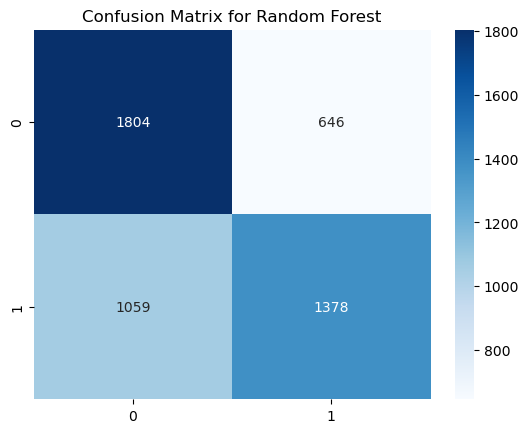


ROC AUC Score for Random Forest: 0.71


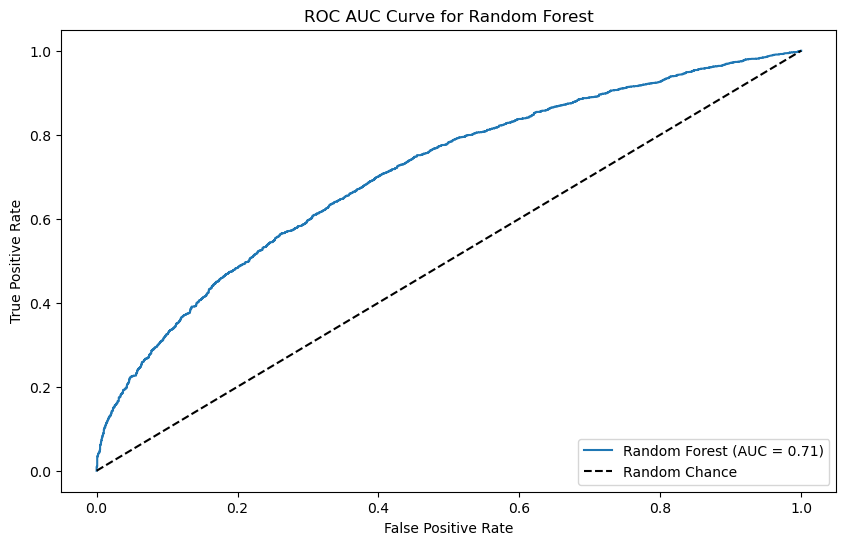

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, predictions))

conf_matrix_dt = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

roc_auc_dt = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score for Decision Tree: {roc_auc_dt:.2f}")

fpr_dt, tpr_dt, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))

conf_matrix_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

roc_auc_rf = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score for Random Forest: {roc_auc_rf:.2f}")

fpr_rf, tpr_rf, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


Best Parameters from Random Search for Random Forest:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best Score from Random Search for Random Forest:  0.6623521822222833
Optimized Random Forest Accuracy: 0.67

Classification Report for Optimized Random Forest:
              precision    recall  f1-score   support

         0.0       0.65      0.74      0.69      2450
         1.0       0.70      0.59      0.64      2437

    accuracy                           0.67      4887
   macro avg       0.67      0.67      0.67      4887
weighted avg       0.67      0.67      0.67      4887



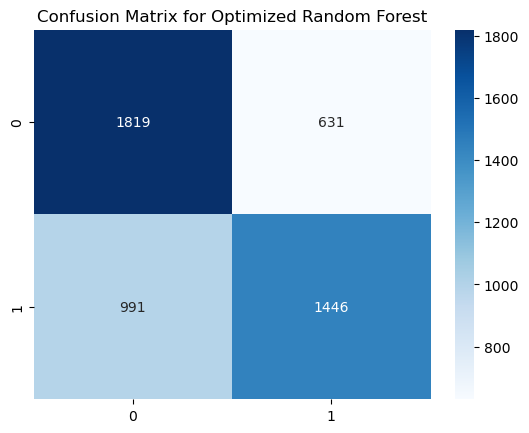


ROC AUC Score for Optimized Random Forest: 0.72


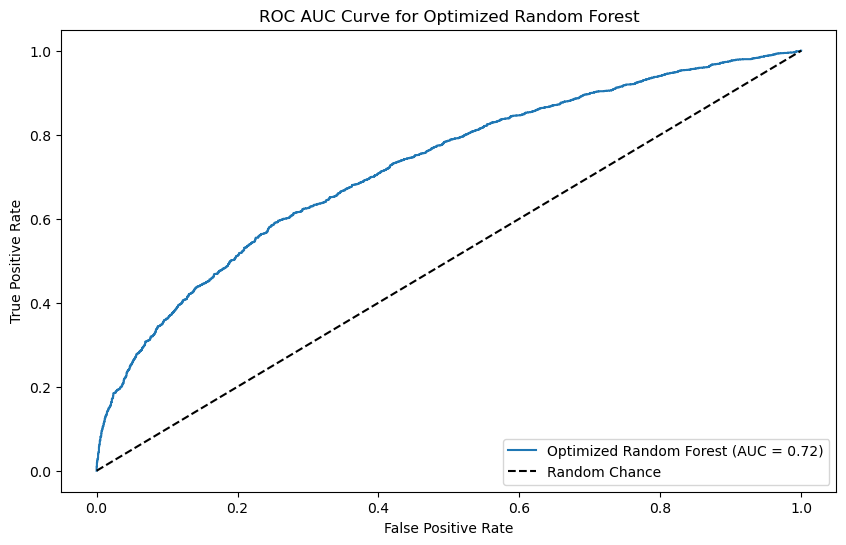

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

param_dist = {
    'n_estimators': np.linspace(10, 100, num=10, dtype=int),
    'max_depth': np.linspace(3, 10, num=8, dtype=int),
    'min_samples_split': np.linspace(2, 10, num=9, dtype=int),
    'min_samples_leaf': np.linspace(1, 5, num=5, dtype=int)
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

best_params_random = random_search_rf.best_params_
best_score_random = random_search_rf.best_score_

print("Best Parameters from Random Search for Random Forest: ", best_params_random)
print("Best Score from Random Search for Random Forest: ", best_score_random)

optimal_rf_model = RandomForestClassifier(**best_params_random)
optimal_rf_model.fit(X_train, y_train)
y_pred_optimal_rf = optimal_rf_model.predict(X_test)
print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_optimal_rf):.2f}")

print("\nClassification Report for Optimized Random Forest:")
print(classification_report(y_test, y_pred_optimal_rf))

conf_matrix_opt_rf = confusion_matrix(y_test, y_pred_optimal_rf)
sns.heatmap(conf_matrix_opt_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Optimized Random Forest")
plt.show()

roc_auc_opt_rf = roc_auc_score(y_test, optimal_rf_model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score for Optimized Random Forest: {roc_auc_opt_rf:.2f}")

fpr_opt_rf, tpr_opt_rf, _ = roc_curve(y_test, optimal_rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_opt_rf, tpr_opt_rf, label=f'Optimized Random Forest (AUC = {roc_auc_opt_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Optimized Random Forest')
plt.legend(loc='lower right')
plt.show()


Best Parameters from Focused Random Search for Random Forest:  {'n_estimators': 65, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 11}
Best Score from Focused Random Search for Random Forest:  0.6653706215376805
Optimized Random Forest Accuracy (Focused): 0.66

Classification Report for Optimized Random Forest (Focused):
              precision    recall  f1-score   support

         0.0       0.65      0.73      0.69      2450
         1.0       0.69      0.60      0.64      2437

    accuracy                           0.66      4887
   macro avg       0.67      0.66      0.66      4887
weighted avg       0.67      0.66      0.66      4887



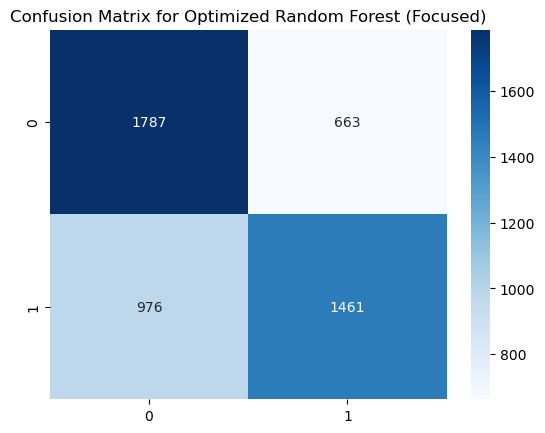


ROC AUC Score for Optimized Random Forest (Focused): 0.72


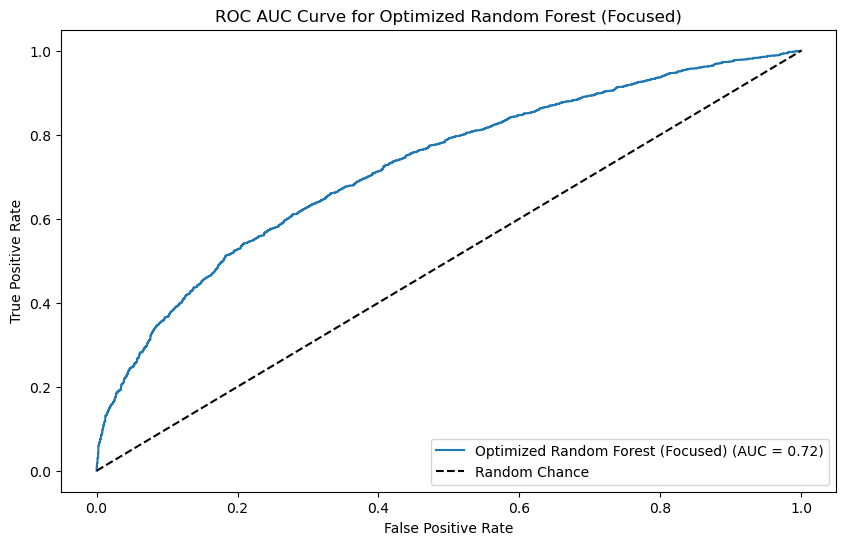

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

param_dist_focused = {
    'n_estimators': np.linspace(50, 70, num=5, dtype=int),
    'max_depth': np.linspace(7, 11, num=5, dtype=int),
    'min_samples_split': np.linspace(4, 6, num=3, dtype=int),
    'min_samples_leaf': np.linspace(1, 3, num=3, dtype=int)
}

random_search_rf_focused = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_focused, n_iter=20, cv=5, n_jobs=-1)
random_search_rf_focused.fit(X_train, y_train)

best_params_random_focused = random_search_rf_focused.best_params_
best_score_random_focused = random_search_rf_focused.best_score_

print("Best Parameters from Focused Random Search for Random Forest: ", best_params_random_focused)
print("Best Score from Focused Random Search for Random Forest: ", best_score_random_focused)

optimal_rf_model_focused = RandomForestClassifier(**best_params_random_focused)
optimal_rf_model_focused.fit(X_train, y_train)
y_pred_optimal_rf_focused = optimal_rf_model_focused.predict(X_test)
print(f"Optimized Random Forest Accuracy (Focused): {accuracy_score(y_test, y_pred_optimal_rf_focused):.2f}")

print("\nClassification Report for Optimized Random Forest (Focused):")
print(classification_report(y_test, y_pred_optimal_rf_focused))

conf_matrix_opt_rf_focused = confusion_matrix(y_test, y_pred_optimal_rf_focused)
sns.heatmap(conf_matrix_opt_rf_focused, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Optimized Random Forest (Focused)")
plt.show()

roc_auc_opt_rf_focused = roc_auc_score(y_test, optimal_rf_model_focused.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score for Optimized Random Forest (Focused): {roc_auc_opt_rf_focused:.2f}")

fpr_opt_rf_focused, tpr_opt_rf_focused, _ = roc_curve(y_test, optimal_rf_model_focused.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_opt_rf_focused, tpr_opt_rf_focused, label=f'Optimized Random Forest (Focused) (AUC = {roc_auc_opt_rf_focused:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Optimized Random Forest (Focused)')
plt.legend(loc='lower right')
plt.show()


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_resampled_rfe, y_resampled, test_size=0.2, random_state=42)


SVM Accuracy: 0.62

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.61      0.69      0.64      2450
         1.0       0.64      0.55      0.59      2437

    accuracy                           0.62      4887
   macro avg       0.62      0.62      0.62      4887
weighted avg       0.62      0.62      0.62      4887



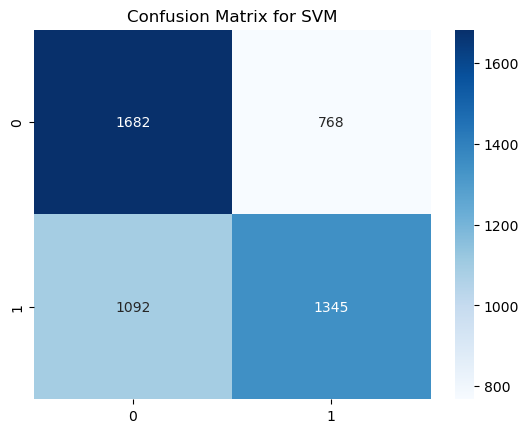


ROC AUC Score for SVM: 0.67


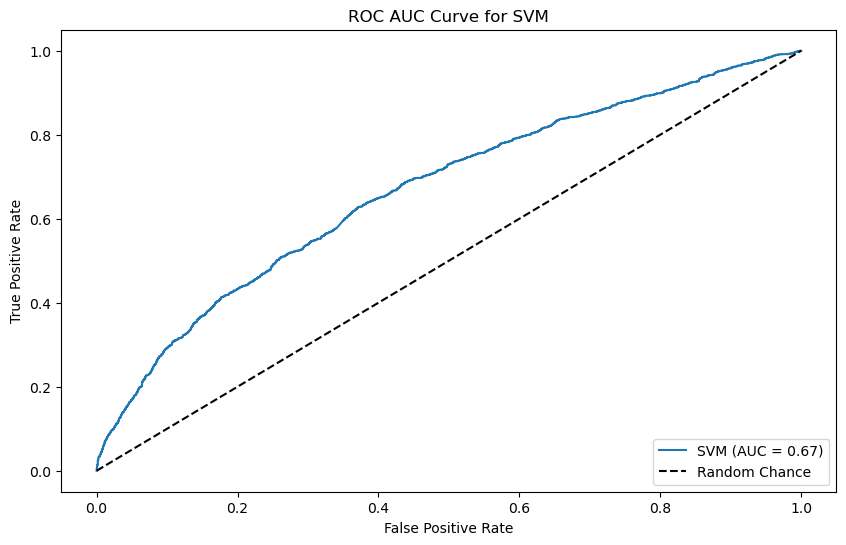

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.show()

roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f"\nROC AUC Score for SVM: {roc_auc_svm:.2f}")

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for SVM')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

file_path = 'engine_data_cleaned.csv'
data_cleaned = pd.read_csv(file_path)

features = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']
target = 'Engine Condition'

X = data_cleaned[features]
y = data_cleaned[target]

best_params_random_focused = {
    'n_estimators': 70,
    'max_depth': 11,
    'min_samples_split': 4,
    'min_samples_leaf': 1
}
model = RandomForestClassifier(**best_params_random_focused, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

model.fit(X, y)

model_path = 'random_forest_model_focused.pkl'
joblib.dump(model, model_path)


Cross-Validation Accuracy: 0.66 ± 0.01


['random_forest_model_focused.pkl']